<a href="https://colab.research.google.com/github/starkjones/KMeans-Clustering-/blob/main/KMeans_Find_K_(Core)_JJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Find KMeans**
Jonathan Jones

22.05.19

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Use KMeans to create various customer segments.

Use an Elbow Plot of inertia

And a plot of Silhouette Scores

Choose a K based on the results.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data = '/content/drive/MyDrive/Colab Notebooks/Week 8/cust_seg (1).csv'

df = pd.read_csv(data)

df.head()

Mounted at /content/drive


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
# Preliminary datatype check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [5]:
# Cbeck for duplicated rows:

df.duplicated().sum()

0

In [6]:
# Check for missing values:

df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
# Removal of ineffectual columns:

df.drop(columns = 'Unnamed: 0', inplace =True)

In [33]:
df['Defaulted'].values

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [24]:
# Imputation:

df['Defaulted'].fillna(0, inplace = True)

# Missing 150/850 = 17.65 %

In [25]:
# Final Check: 

df.isna().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
cluster            0
dtype: int64

"We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments."

In [26]:
# New data with selected features:

x = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]

x.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [34]:
# Scaling the Data

scaler = StandardScaler()

scaled_x = scaler.fit_transform(x)

## **Inertia Plot**

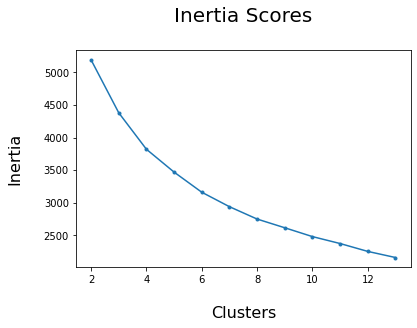

In [35]:
# Create an empty list of interia:

inertia = []

# Loop through k values between 2 and 10:

for k in range(2,14):
  km = KMeans(n_clusters = k)
  km.fit(scaled_x)

# Store inertias in empty list above:
  inertia.append(km.inertia_)

# Visualize Scores:

plt.plot(range(2,14), inertia, marker = '.')
plt.title('Inertia Scores\n', fontsize =20)
plt.xlabel('\nClusters', fontsize = 16);
plt.ylabel('Inertia\n', fontsize = 16);

## **Silhouette Plot**

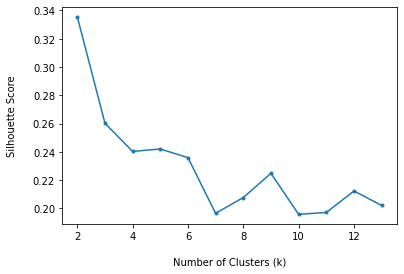

In [36]:
# Save Silhouette scores for various cluster numbers: 

silho = []

for i in range(2, 14):
  km = KMeans(n_clusters = i)
  km.fit(scaled_x)

# Store inertias in empty list above:
  silho.append(silhouette_score(scaled_x, km.labels_))

# Plot scores:

plt.plot(range(2,14), silho, marker = '.');
plt.xlabel('\nNumber of Clusters (k)');
plt.ylabel('Silhouette Score\n');

Highest silhouetter score is at k = 2. 

In [30]:
# Instantiate Model:
KM = KMeans(n_clusters= 2, random_state = 42)

# Fit model to Data:
KM.fit(scaled_x)

# Evaluate Score:
ss = silhouette_score(scaled_x, KM.labels_)

print('The Optimal Silhouette Score for our model is: ', ss)

The Optimal Silhouette Score for our model is:  0.3377192956984016


In [31]:
# Add column to dataframe for cluster label:

df['cluster'] = KM.fit_predict(scaled_x)

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


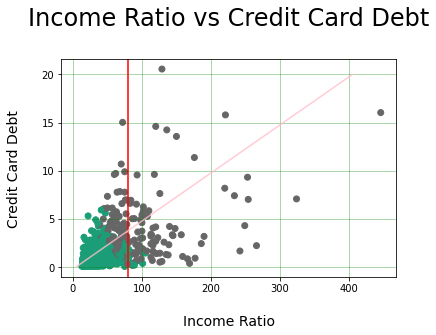

In [32]:
# Plot a few features with cluster as their demarcation:

plt.scatter(x = df['Income'], y = df['Card Debt'], c = df['cluster'], cmap = 'Dark2');
plt.axvline(x=80, color = 'red')
plt.plot(range(5,500,100), range(0,25,5), color = 'pink', alpha = .8)
plt.title('Income Ratio vs Credit Card Debt\n', fontsize = 24)
plt.xlabel('\nIncome Ratio', fontsize = 14);
plt.ylabel('Credit Card Debt\n', fontsize = 14);
plt.grid(axis= 'both', color = 'green', alpha = .4)

## **Analysis:**

There is a linear relationship with income and credit card debt. As customers earn more there is a tendency to take on more debt. When grouped by income four different APRs / rewards programs could be considered: 

1.   People making below 80,000.00 dollars (red line) with Credit Card Debt (CCD) below 5%.
2.   People making below 80,000.00 dollars with CCD above 5%.
3.   People who make 80,000.00 to 200,000.00 dollars.
4.   People who make above 200,000.00 dollars. 

